# Ciencia de datos (CC408) - Primavera 2024

## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Domingo Domingo 8 de septiembre a las 23:59hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 2 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- al siguiente email: ispiousas@udesa.edu.ar
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

### Parte A

#### Ejercicio 1
Usando la API de Mercado Libre, obtener los ítems de una consulta de búsqueda. Pueden buscar cualquier producto de su interés.

In [1]:
# Resolver acá
import requests
buscar = "set de legos"
url = "https://api.mercadolibre.com/sites/{}/search?q={}".format("MLA", buscar.replace(" ", "%20"))

# Hacemos el pedido o request y obtenemos la response
response = requests.request("GET", url)
print(response) # correcto

# Vemos el texto
response.text

<Response [200]>


'{"site_id":"MLA","country_default_time_zone":"GMT-03:00","query":"set de legos","paging":{"total":293,"primary_results":293,"offset":0,"limit":50},"results":[{"id":"MLA1737589104","title":"Lego® Minecraft - La Aventura En El Pantano (21240) Cantidad De Piezas 65","condition":"new","thumbnail_id":"641883-MLU72493433316_102023","catalog_product_id":"MLA24525438","listing_type_id":"gold_special","sanitized_title":"lego-minecraft-la-aventura-en-el-pantano-21240-cantidad-de-piezas-65","permalink":"https://www.mercadolibre.com.ar/lego-minecraft-la-aventura-en-el-pantano-21240-cantidad-de-piezas-65/p/MLA24525438#wid=MLA1737589104&sid=unknown","buying_mode":"buy_it_now","site_id":"MLA","category_id":"MLA1157","domain_id":"MLA-TOY_BUILDING_SETS","thumbnail":"http://http2.mlstatic.com/D_641883-MLU72493433316_102023-I.jpg","currency_id":"ARS","order_backend":1,"price":39490,"original_price":null,"sale_price":{"price_id":"","amount":39490,"conditions":{"eligible":true,"context_restrictions":[],"s

#### Ejercicio 2
Guarden los precios de los ítems obtenidos en un dataframe y calculen el precio promedio, el mínimo y el máximo. 

In [19]:
# Resolver acá
import pandas as pd
datos=response.json()
#print(datos["results"][0]["price"])

precios=[] #creamos una lista vacia para colocar los precios
productos = [] #creamos otroa lista para los nombres
for i in range(len(datos["results"])):
    precios.append(datos["results"][i]["price"]) #con el append vamos agregando al final de la lista cada uno de los precios en orden
    productos.append(datos["results"][i]["title"]) #hacemos lo mismo con los nombres de los productos


mp_productos = pd.DataFrame({'Nombre': productos,  #colocamos ambas listas como columnas de un dataframe
     'Precio': precios})



promedio=sum(mp_productos["Precio"])/len(mp_productos)
print("El promedio de los precios es de", promedio)

minimo=min(mp_productos["Precio"])
prod_min = mp_productos[mp_productos["Precio"]==minimo]["Nombre"].to_string(index=False)
print("El menor precio es del producto:", prod_min, ", con un costo de $" + str(minimo))

maximo=max(mp_productos["Precio"])
prod_max = mp_productos[mp_productos["Precio"]==maximo]["Nombre"].to_string(index=False)
print("El menor precio es del producto:", prod_max, ", con un costo de $" + str(maximo))



mp_productos

El promedio de los precios es de 119184.46179999999
El menor precio es del producto: Set Lego Coche De Carreras 30640 - 44 Piezas , con un costo de $17947.0
El menor precio es del producto: Set Lego Harry Potter Tm 76419 Castillo De Hogw... , con un costo de $764999.99


,Nombre,Precio
0,Lego® Minecraft - La Aventura En El Pantano (2...,39490.00
1,Lego Star Wars - 501st Clone Troopers Battle P...,73799.99
2,Set De Construcción Lego Star Wars 30685 48 Pi...,22999.95
3,Set Lego Harry Potter Tm 76419 Castillo De Hog...,764999.99
4,Lego® Technic - Monster Jam Monster Mutt Dalma...,87399.05
5,Lego Marvel - Hulkbuster: Batalla De Wakanda (...,222899.00
6,Set Lego Technic 42167 Camión De Residuos Mack...,111999.00
7,Lego® Minecraft - El Portal En Ruinas (21172) ...,133900.00
8,Lego® City - Moto De Policía Y Coche A La Fuga...,39520.00
9,Lego® Ninjago - Coche De Carreras Ninja Evo De...,38290.00


#### Ejercicio 3
Armen un histograma de los precios. ¿Ven algún <i>outlier<i>? 
Nota: pueden usar la librería de Matplotlib o la de Pandas.

array([[<Axes: title={'center': 'Precio'}>]], dtype=object)

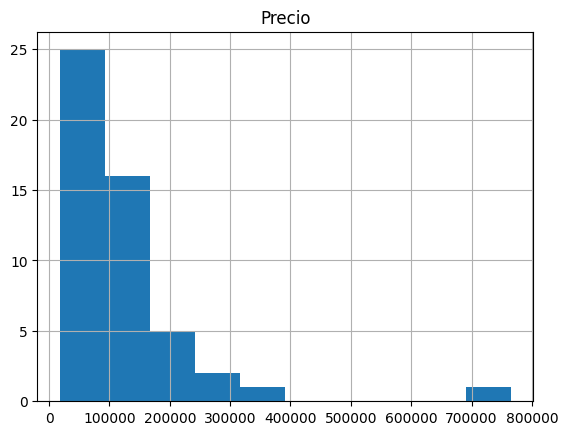

In [21]:
# Resolver acá

mp_productos.hist("Precio")

#### Ejercicio 4
Realicen alguna consulta adicional utilizando la API de Mercado Libre (debe ser alguna consulta que no se haya visto en clase. Por ejemplo, obtener los ítems de un vendedor en particular, obtener los productos de una categoría u otros). Analicen los resultados y comenten uno o dos que les parezcan interesantes (por ejemplo, precios promedio de los productos de un vendedor, diferencia entre el precio original y actual, si acepta mercado pago para la compra de productos, etc.) 

In [23]:
# Resolver acá

import requests
buscar = "set de legos"
url = "https://api.mercadolibre.com/sites/{}/search?q={}".format("MLA", buscar.replace(" ", "%20"))

# Hacemos el pedido o request y obtenemos la response
response = requests.request("GET", url)
print(response) # correcto

# Vemos el texto
response.text




<Response [200]>


'{"site_id":"MLA","country_default_time_zone":"GMT-03:00","query":"set de legos","paging":{"total":293,"primary_results":293,"offset":0,"limit":50},"results":[{"id":"MLA1737589104","title":"Lego® Minecraft - La Aventura En El Pantano (21240) Cantidad De Piezas 65","condition":"new","thumbnail_id":"641883-MLU72493433316_102023","catalog_product_id":"MLA24525438","listing_type_id":"gold_special","sanitized_title":"lego-minecraft-la-aventura-en-el-pantano-21240-cantidad-de-piezas-65","permalink":"https://www.mercadolibre.com.ar/lego-minecraft-la-aventura-en-el-pantano-21240-cantidad-de-piezas-65/p/MLA24525438#wid=MLA1737589104&sid=unknown","buying_mode":"buy_it_now","site_id":"MLA","category_id":"MLA1157","domain_id":"MLA-TOY_BUILDING_SETS","thumbnail":"http://http2.mlstatic.com/D_641883-MLU72493433316_102023-I.jpg","currency_id":"ARS","order_backend":1,"price":39490,"original_price":null,"sale_price":{"price_id":"","amount":39490,"conditions":{"eligible":true,"context_restrictions":[],"s

In [54]:
id1=datos["results"][0]["catalog_product_id"]
id2=datos["results"][0]["id"]

url = "https://api.mercadolibre.com/reviews/item/"+str(id2)

response1 = requests.request("GET", url)

print(response1)

response1.json()


<Response [403]>


{'blocked_by': 'PolicyAgent',
 'message': 'At least one policy returned UNAUTHORIZED.',
 'code': 'PA_UNAUTHORIZED_RESULT_FROM_POLICIES',
 'status': 403}

### Parte B

#### Ejercicio 5
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/), utilicen herramientas de web scraping para obtener los links de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [ ]:
# Resolver acá
